In [1]:
%matplotlib qt5
from scipy.io import loadmat
import mne

In [2]:
mat = loadmat("A01T.mat")

In [3]:
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Thu Aug  7 13:07:03 2014',
 '__version__': '1.0',
 '__globals__': [],
 'data': array([[array([[(array([[-21.14257812, -23.68164062, -21.484375  , ...,  31.73828125,
         -13.671875  , -43.9453125 ],
        [-21.92382812, -23.92578125, -24.31640625, ...,  22.4609375 ,
         -13.18359375, -40.52734375],
        [-15.625     , -19.7265625 , -18.84765625, ...,  33.69140625,
          -8.30078125, -38.57421875],
        ...,
        [-26.41601562, -17.52929688, -17.28515625, ..., -14.6484375 ,
         -40.52734375, -19.53125   ],
        [-31.98242188, -16.65039062, -21.72851562, ..., -11.71875   ,
         -48.33984375, -12.6953125 ],
        [-33.984375  , -22.4609375 , -23.92578125, ...,  -7.8125    ,
         -42.96875   ,  -9.27734375]]), array([], shape=(0, 1), dtype=uint8), array([], shape=(0, 1), dtype=uint8), array([[250]], dtype=uint8), array([[array(['left hand'], dtype='<U9'),
         array(['right ha

In [4]:
eeg = mat['data'][0,3]['X'][0,0]*10e-6

In [5]:
eeg

array([[ 3.41796875e-06,  2.44140625e-06, -3.22265625e-05, ...,
         1.02539063e-04,  2.05078125e-04,  5.85937500e-05],
       [-6.34765625e-05, -7.95898438e-05, -1.04980469e-04, ...,
         2.44140625e-05,  7.81250000e-05, -4.88281250e-05],
       [-1.80664063e-05, -7.17773438e-05, -8.15429688e-05, ...,
         6.34765625e-05,  1.36718750e-04, -4.88281250e-06],
       ...,
       [ 2.92968750e-06,  4.88281250e-07, -3.07617188e-05, ...,
        -2.44140625e-05,  4.58984375e-04, -4.39453125e-05],
       [-6.34765625e-05, -5.12695313e-05, -9.71679688e-05, ...,
        -4.88281250e-05,  3.85742188e-04, -4.39453125e-05],
       [-9.71679688e-05, -7.17773438e-05, -1.39648438e-04, ...,
        -5.37109375e-05,  3.95507813e-04, -1.07421875e-04]])

In [6]:
len(eeg)

96735

In [7]:
len(eeg[0])
#22 canales de EEG y 3 de EOG

25

In [8]:
eeg.T

array([[ 3.41796875e-06, -6.34765625e-05, -1.80664063e-05, ...,
         2.92968750e-06, -6.34765625e-05, -9.71679688e-05],
       [ 2.44140625e-06, -7.95898438e-05, -7.17773438e-05, ...,
         4.88281250e-07, -5.12695313e-05, -7.17773438e-05],
       [-3.22265625e-05, -1.04980469e-04, -8.15429688e-05, ...,
        -3.07617188e-05, -9.71679688e-05, -1.39648438e-04],
       ...,
       [ 1.02539063e-04,  2.44140625e-05,  6.34765625e-05, ...,
        -2.44140625e-05, -4.88281250e-05, -5.37109375e-05],
       [ 2.05078125e-04,  7.81250000e-05,  1.36718750e-04, ...,
         4.58984375e-04,  3.85742188e-04,  3.95507813e-04],
       [ 5.85937500e-05, -4.88281250e-05, -4.88281250e-06, ...,
        -4.39453125e-05, -4.39453125e-05, -1.07421875e-04]])

In [9]:
len(eeg.T)

25

In [10]:
len(eeg.T[0])

96735

In [11]:
ch_names = ["Fz", "FC3", "FC1", "FCz", "FC2", "FC4", "C5", "C3", "C1", "Cz",
            "C2", "C4", "C6", "CP3", "CP1", "CPz", "CP2", "CP4", "P1", "Pz",
            "P2", "POz", "EOG1", "EOG2", "EOG3"]

In [12]:
fs=250
info = mne.create_info(ch_names, fs, ch_types=["eeg"]*22 + ["eog"]*3)
raw = mne.io.RawArray(eeg.T, info)
raw.set_montage("standard_1020")

Creating RawArray with float64 data, n_channels=25, n_times=96735
    Range : 0 ... 96734 =      0.000 ...   386.936 secs
Ready.
DigMontage is a superset of info. 72 in DigMontage will be ignored. The ignored channels are: {'AF6', 'M1', 'AF10', 'TP7', 'Oz', 'FT10', 'PO8', 'FT9', 'CP6', 'P6', 'FT7', 'T6', 'FC5', 'AF5', 'F3', 'TP9', 'PO7', 'FT8', 'P4', 'AF4', 'T4', 'PO1', 'AF3', 'CP5', 'AF9', 'F1', 'O10', 'PO2', 'P8', 'AF2', 'F7', 'F6', 'T7', 'Fp2', 'PO5', 'Fpz', 'P5', 'A1', 'A2', 'P3', 'T3', 'O1', 'F8', 'T10', 'T9', 'TP8', 'P10', 'PO9', 'TP10', 'PO3', 'O9', 'Iz', 'M2', 'P7', 'FC6', 'F10', 'F4', 'O2', 'AF7', 'T8', 'AF1', 'PO10', 'PO6', 'F5', 'P9', 'AF8', 'AFz', 'F2', 'F9', 'T5', 'PO4', 'Fp1'}


<RawArray  |  None, n_channels x n_times : 25 x 96735 (386.9 sec), ~18.5 MB, data loaded>

In [13]:
raw_tmp = raw.copy()
raw_tmp.filter(1, None)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 sec)



<RawArray  |  None, n_channels x n_times : 25 x 96735 (386.9 sec), ~18.5 MB, data loaded>

In [14]:
ica = mne.preprocessing.ICA(method="infomax", fit_params=dict(extended=True),random_state=1)
ica.fit(raw_tmp)

Fitting ICA to data using 22 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 22
Computing Extended Infomax ICA
Fitting ICA took 46.0s.


<ICA  |  raw data decomposition, fit (infomax): 96735 samples, 22 components, channels used: "eeg">

In [22]:
ica.plot_components(inst=raw_tmp)

[<Figure size 750x700 with 20 Axes>, <Figure size 360x250 with 2 Axes>]

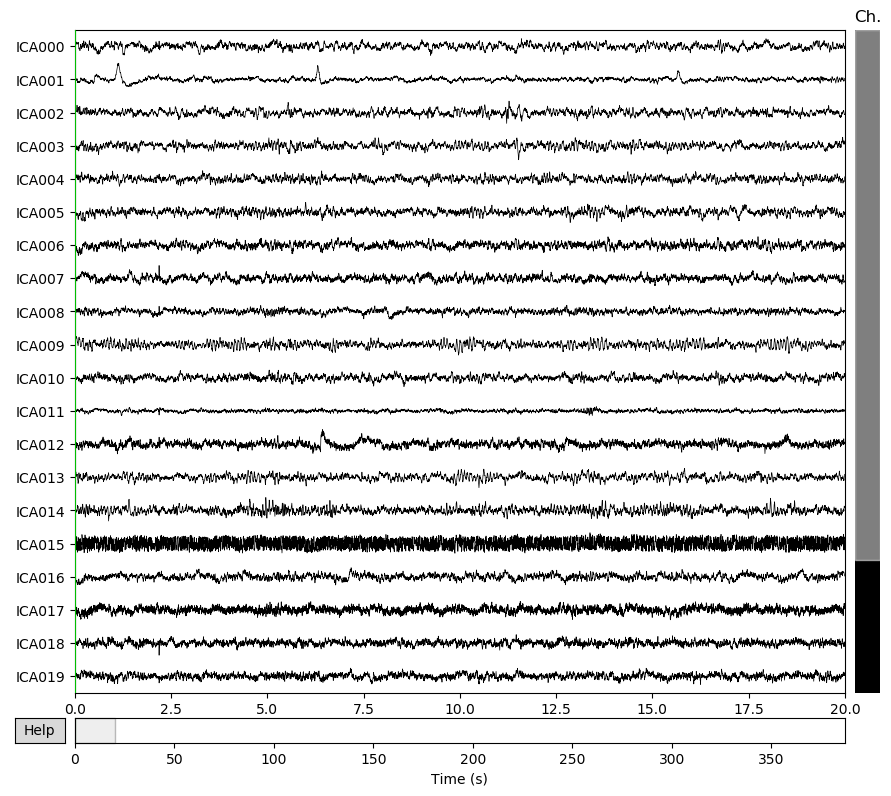

In [16]:
ica.plot_sources(inst=raw_tmp)

In [17]:
ica.exclude = [1]

In [18]:
raw_corrected = raw.copy()
ica.apply(raw_corrected)

Transforming to ICA space (22 components)
Zeroing out 1 ICA components


<RawArray  |  None, n_channels x n_times : 25 x 96735 (386.9 sec), ~18.5 MB, data loaded>

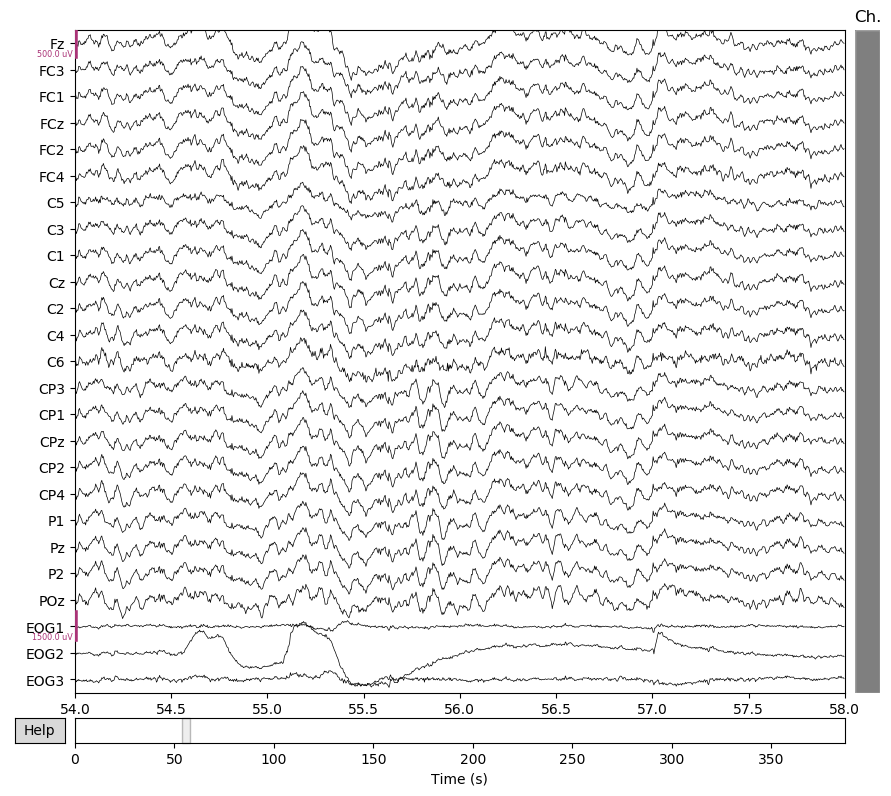

In [19]:
raw.plot(n_channels=25, start=54, duration=4,
         scalings=dict(eeg=250e-6, eog=750e-6))

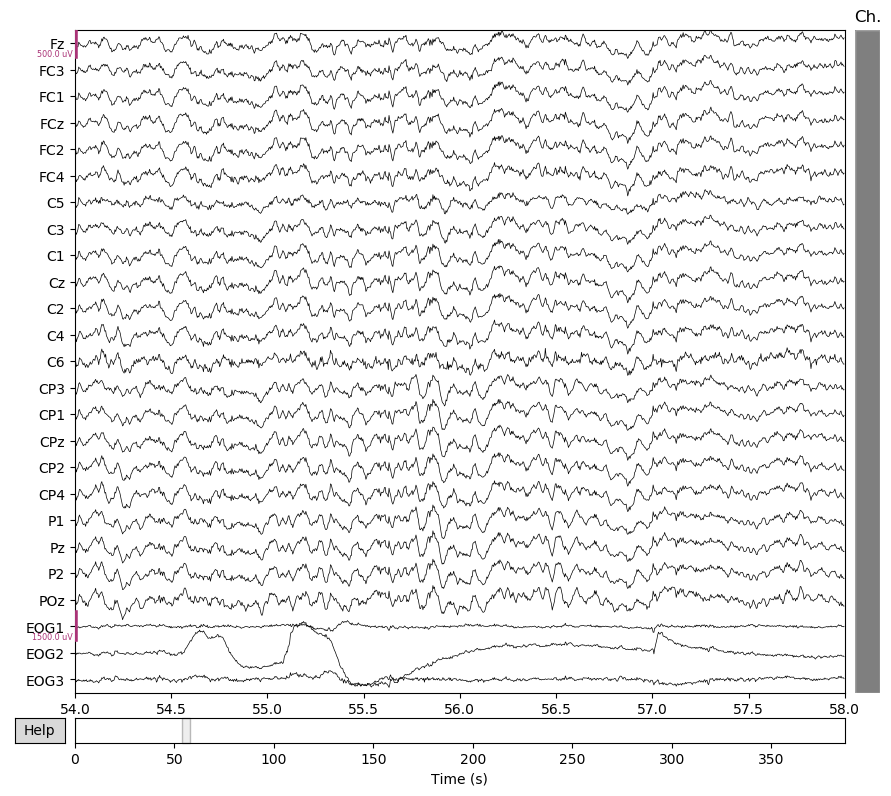

In [20]:
raw_corrected.plot(n_channels=25, start=54, duration=4,
                   scalings=dict(eeg=250e-6, eog=750e-6))